# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

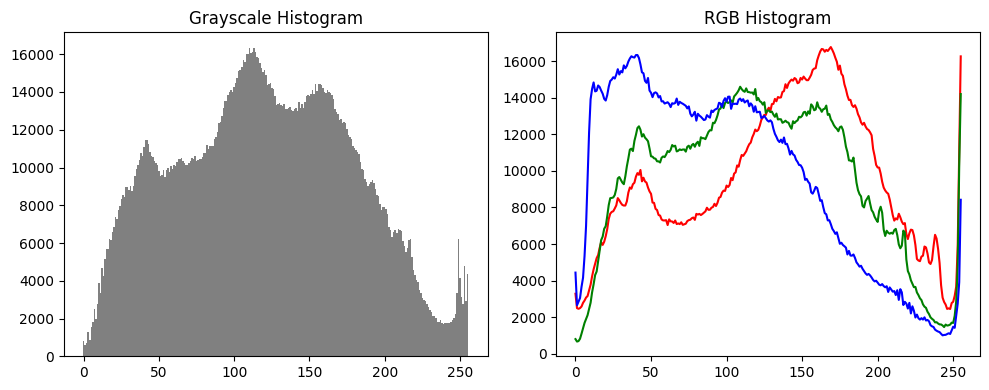

In [ ]:
import numpy as np, matplotlib.pyplot as plt, requests, io
from PIL import Image


url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
response = requests.get(url, headers=headers) # Send headers with request

img = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))
gray_img = np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(int)

def gray_histogram(gray_input):
    hist = np.zeros(256, dtype=int)
    # Pure NumPy loop (using ravel to flatten 2D -> 1D for a single loop)
    for pix in gray_input.ravel():
        hist[pix]+=1
    return hist

plt.figure(figsize=(10, 4))

# 1. Grayscale Plot
plt.subplot(1, 2, 1); plt.title("Grayscale Histogram")
plt.bar(range(256), gray_histogram(gray_img), color='gray', width=1.0)

# 2. RGB Plot
plt.subplot(1, 2, 2); plt.title("RGB Histogram")
for i, c in enumerate(['r', 'g', 'b']):
    plt.plot(gray_histogram(img[:, :, i]), color=c)

plt.tight_layout(); plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

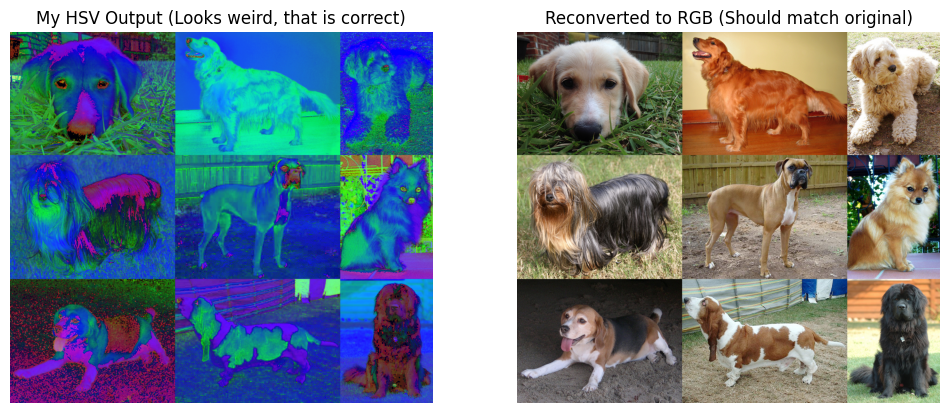

In [ ]:
import numpy as np, matplotlib.pyplot as plt, requests, io, cv2
from PIL import Image

# 1. Load Image from URL
url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
img_rgb = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))

def rgb_to_hsv_optimized(img):
    arr = img.astype('float32') / 255.0
    r, g, b = arr[...,0], arr[...,1], arr[...,2]

    # Calculate Value (V), Max, Min, Delta
    c_max, c_min = arr.max(axis=2), arr.min(axis=2)
    delta = c_max - c_min

    # Calculate Saturation (S)
    # Use np.divide with 'where' to handle division by zero safely
    s = np.divide(delta, c_max, out=np.zeros_like(delta), where=c_max!=0)

    # Calculate Hue (H) using np.select for cleaner logic
    # Default 0. Indices: 0=Red max, 1=Green max, 2=Blue max
    conditions = [c_max == r, c_max == g, c_max == b]
    # Note: Added delta normalization inside choices to avoid extra steps
    choices = [
        (g-b)/np.where(delta==0,1,delta),     # Red calc (mod 6 handled later)
        (b-r)/np.where(delta==0,1,delta)+2, # Green calc
        (r-g)/np.where(delta==0,1,delta)+4  # Blue calc
    ]
    h=np.select(conditions, choices, default=0)

    # Finalize H: (h * 60) % 360.
    # The (h % 6) trick handles the Red segment wraparound correctly.
    h=(h%6)*60

    # Scale to OpenCV ranges: H -> 0-179, S -> 0-255, V -> 0-255
    return np.dstack([
        (h/2).astype(np.uint8),
        (s*255).astype(np.uint8),
        (c_max*255).astype(np.uint8)
    ])

# 2. Execute
hsv_result=rgb_to_hsv_optimized(img_rgb)

# 3. Verify by converting BACK to RGB
reconverted_rgb=cv2.cvtColor(hsv_result, cv2.COLOR_HSV2RGB)

# 4. Plot
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
# Note: HSV looks "weird" in imshow because it interprets H,S,V as Red,Green,Blue
plt.imshow(hsv_result)
plt.title("My HSV Output (Looks weird, that is correct)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconverted_rgb)
plt.title("Reconverted to RGB (Should match original)")
plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

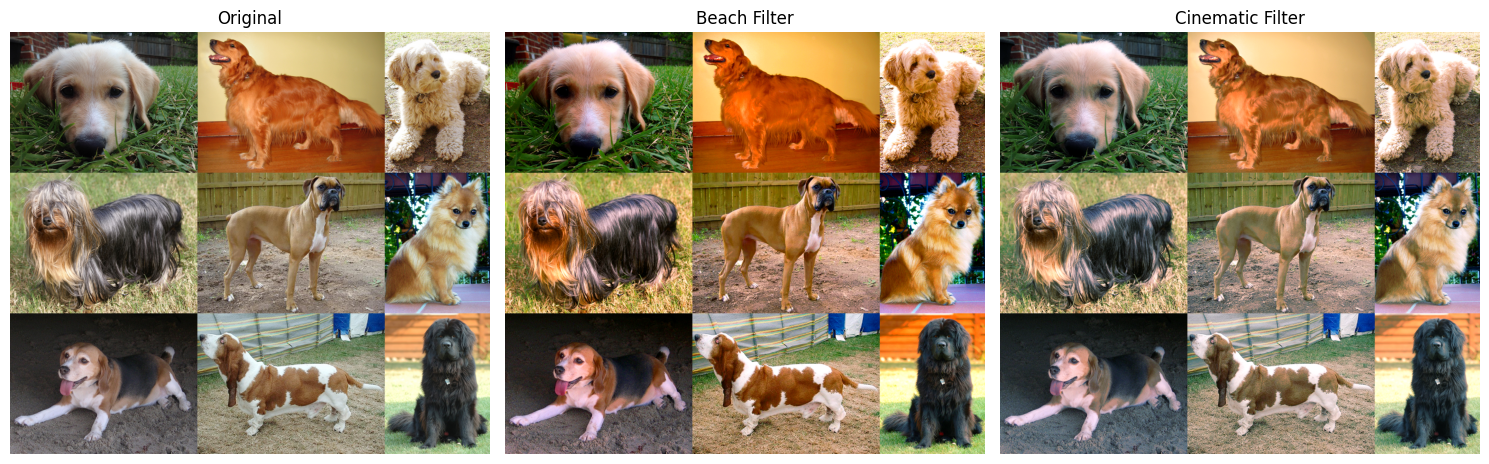

In [ ]:
import numpy as np, matplotlib.pyplot as plt, requests, io, cv2
from PIL import Image

# --- HEADER: LOAD IMAGE ---
url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
img = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))

# --- FILTER FUNCTIONS ---
def filter_beach_like(img):
  #  Contrast + saturation boost + warm highlight tint
    # 1. Contrast
    out = img.astype(np.float32)
    out = 128 + 1.08 * (out - 128)
    out = np.clip(out, 0, 255).astype(np.uint8)

    # 2. Saturation Boost (Using cv2 ensures correct 0-255 ranges)
    hsv = cv2.cvtColor(out, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    # Scale S to float for math, then boost
    s = s.astype(np.float32) * 1.5  # Increased boost to make it obvious
    s = np.clip(s, 0, 255).astype(np.uint8)

    # Merge back
    hsv = cv2.merge([h, s, v])
    out = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB).astype(np.float32)

    # 3. Warm Tint (Fixed Chained Indexing Bug)
    lum = 0.299*out[...,0] + 0.587*out[...,1] + 0.114*out[...,2]
    mask = lum > 120

    # Use direct channel views to ensure 'out' is modified
    r = out[:,:,0]
    r[mask] = np.clip(r[mask] * 1.1 + 10, 0, 255) # Stronger red push

    return out.astype(np.uint8)

def filter_cinematic(img):
    # Teal shadows + warm highlights + mild curve
    out = img.astype(np.float32)
    lum = 0.299*out[...,0] + 0.587*out[...,1] + 0.114*out[...,2]

    # Widen ranges to catch more pixels
    shadows = lum < 120
    highlights = lum > 140

    # Direct views to fix "Chained Assignment" bug (where changes weren't saving)
    r, g, b = out[:,:,0], out[:,:,1], out[:,:,2]

    # Teal shadows (Less Red, More Green/Blue)
    r[shadows] *= 0.85
    g[shadows] *= 1.05
    b[shadows] *= 1.15

    # Warm highlights (More Red)
    r[highlights] = np.clip(r[highlights] * 1.1 + 5, 0, 255)

    # Contrast S-Curve
    out = np.dstack([r, g, b]) # Stack back modified channels
    out = 128 + 1.05 * (out - 128)
    out = np.clip(out, 0, 255)

    return np.clip(np.round(out), 0, 255).astype(np.uint8)

# --- PLOT RESULTS ---
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1); plt.title("Original"); plt.imshow(img); plt.axis('off')
plt.subplot(1, 3, 2); plt.title("Beach Filter"); plt.imshow(filter_beach_like(img)); plt.axis('off')
plt.subplot(1, 3, 3); plt.title("Cinematic Filter"); plt.imshow(filter_cinematic(img)); plt.axis('off')
plt.tight_layout(); plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Detected Max (p99) - R:254.0, G:228.0, B:123.0


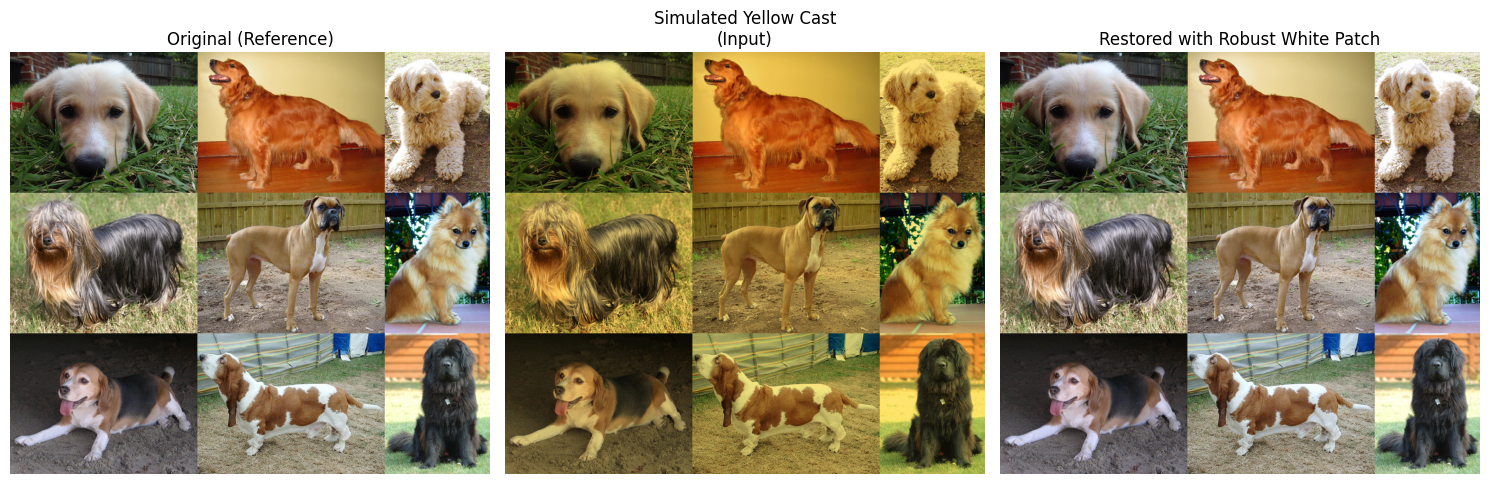

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
from PIL import Image

# 1. Load Image
url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
img_original = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))

# 2. INTRODUCE A PROBLEM (Simulate bad lighting)
# We multiply the image by a "Yellow" tint so we can test if the fix works.
# R=1.0, G=0.9, B=0.5 (Low Blue creates Yellow)
tint_factors = [1.0, 0.9, 0.5]
img_tinted = (img_original * tint_factors).astype(np.uint8)

def white_patch_robust(img, percentile=99):
    """
    Uses the 99th percentile brightness to ignore glare/white pixels
    and force a color balance adjustment.
    """
    # Work with float32 to prevent overflow during math
    a = img.astype(np.float32)

    # Calculate the 99th percentile for each channel
    mr = np.percentile(a[..., 0], percentile) or 1.0
    mg = np.percentile(a[..., 1], percentile) or 1.0
    mb = np.percentile(a[..., 2], percentile) or 1.0

    print(f"Detected Max (p{percentile}) - R:{mr:.1f}, G:{mg:.1f}, B:{mb:.1f}")

    # Create output array
    out = np.zeros_like(a)

    # Apply White Patch Math: I_out = I_in * (255 / P_99)
    out[..., 0] = np.clip(a[..., 0] * (255.0 / mr), 0, 255)
    out[..., 1] = np.clip(a[..., 1] * (255.0 / mg), 0, 255)
    out[..., 2] = np.clip(a[..., 2] * (255.0 / mb), 0, 255)

    return out.astype(np.uint8)

# 3. Apply the fix to the TINTED image
result = white_patch_robust(img_tinted)

# 4. Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original (Reference)")
plt.imshow(img_original)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Simulated Yellow Cast\n(Input)")
plt.imshow(img_tinted)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Restored with Robust White Patch")
plt.imshow(result)
plt.axis('off')

plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

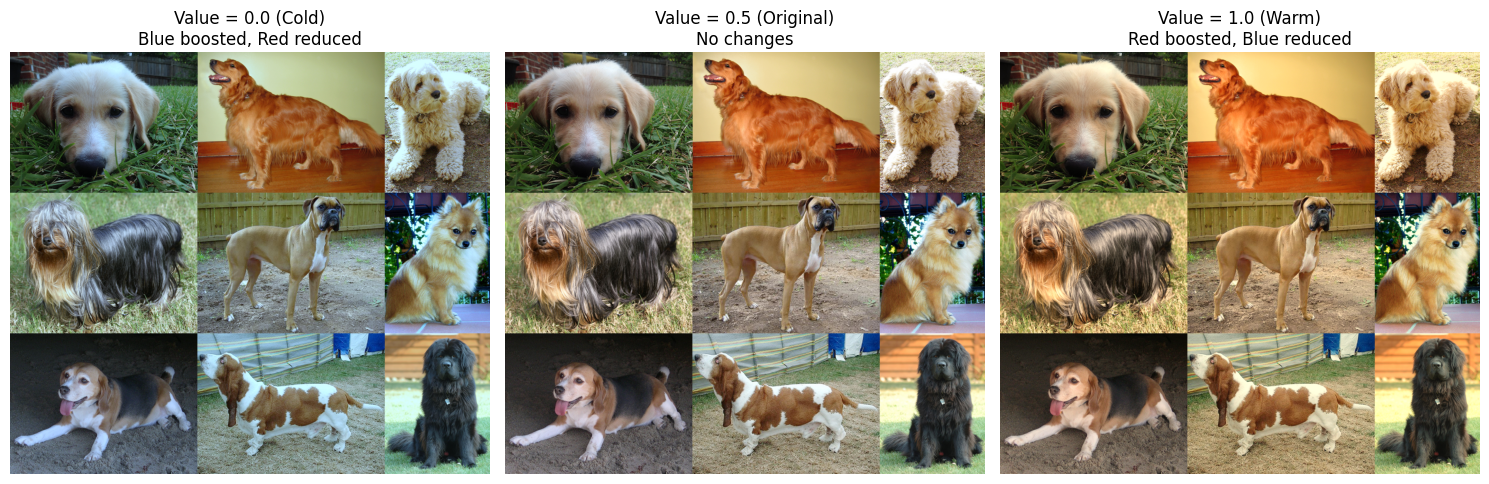

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
from PIL import Image

# 1. Load the Image
url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
img = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))

# 2. Define the White Balance Slider Function
def white_balance(img, value):
    """
    Simulates a color temperature slider.
    value: 0.0 (Coldest) -> 0.5 (Original) -> 1.0 (Warmest)
    """
    if not (0.0 <= value <= 1.0):
        raise ValueError("Value must be between 0.0 and 1.0")

    # Define color multipliers
    # Cold: Suppress Red (0.85), Boost Blue (1.12)
    cold_vector = np.array([0.85, 1.0, 1.12])

    # Warm: Boost Red (1.12), Suppress Blue (0.88)
    warm_vector = np.array([1.12, 1.03, 0.88])

    # Normalize value from [0, 1] to [-1, 1]
    # m = -1 (Coldest), m = 0 (Original), m = 1 (Warmest)
    m = (value - 0.5) * 2.0

    # Linear Interpolation
    if m <= 0:
        # Interpolate between Cold and Identity
        # When m is -1, strength is 1. When m is 0, strength is 0.
        strength = -m
        multiplier = 1.0 + (cold_vector - 1.0) * strength
    else:
        # Interpolate between Identity and Warm
        strength = m
        multiplier = 1.0 + (warm_vector - 1.0) * strength

    # Apply the multiplier
    out = img.astype(np.float32)
    out[..., 0] = np.clip(out[..., 0] * multiplier[0], 0, 255) # Red
    out[..., 1] = np.clip(out[..., 1] * multiplier[1], 0, 255) # Green
    out[..., 2] = np.clip(out[..., 2] * multiplier[2], 0, 255) # Blue

    return out.astype(np.uint8)

# 3. Process Images
img_cold = white_balance(img, 0.0)  # Coldest
img_orig = white_balance(img, 0.5)  # Neutral (Original)
img_warm = white_balance(img, 1.0)  # Warmest

# 4. Display Results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.title("Value = 0.0 (Cold)\nBlue boosted, Red reduced")
plt.imshow(img_cold)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Value = 0.5 (Original)\nNo changes")
plt.imshow(img_orig)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Value = 1.0 (Warm)\nRed boosted, Blue reduced")
plt.imshow(img_warm)
plt.axis('off')

plt.tight_layout()
plt.show()